# Analysis of the public bike dataset in NYC
## by Seunggyun Han

## Investigation Overview

> This project aims to figure out demographical characteristics of users and temporal distribution of public bike ridings in NYC from June to August in 2020.

## Dataset Overview

> In this project, I will investigate [NYC CitiBike trip dataset](https://s3.amazonaws.com/tripdata/index.html) from June to August in 2020. This data set includes information about individual rides made in NYC.

In [2]:
# import all packages and set plots to be embedded inline
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pydeck

mapbox_key='pk.eyJ1Ijoic2doYW4iLCJhIjoiY2szamxqbjZnMGtmbTNjbXZzamh4cng3dSJ9.GGv4GVVoZ811d6PKi54PrA'

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df_bike = pd.read_csv('data/citibike_master.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The number of trips per each gender and user type
> 1. In terms of 'gender', in the 'Unknown' class, the number of customers is more than the number of subscribers. In the 'Male' or 'Female' class, the number of subscribers is more than the number of customers.<br>
2. The number of male users is more than the number of female users. However, male-female ratio in NYC is 94:100 (source: https://www.states101.com/gender-ratios/new-york#:~:text=The%20New%20York%20Gender%20Ratio,97%3A100)%20or%200.97.)

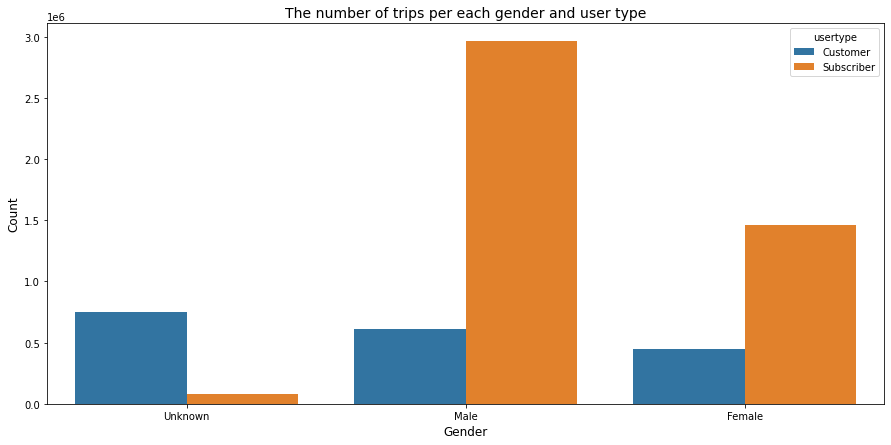

In [5]:
# calculate the numbers of trips per each gender and user type
df_bike_count = df_bike.groupby(['usertype',
                                 'gender'],
                                 as_index=False).count()[['usertype',
                                                          'gender',
                                                          'tripduration']].rename(columns={'tripduration':'count'})

plt.figure(figsize=(15,7))
plt.title('The number of trips per each gender and user type', fontsize=14);
sns.barplot(data=df_bike_count, x='gender', y='count', hue='usertype');
plt.xticks(ticks=[0,1,2], labels=['Unknown','Male','Female']);
plt.xlabel('Gender', fontsize=12);
plt.ylabel('Count', fontsize=12);

## The number of trips by each gender, user type, and day of the week

>1. The trend of the changes in the number of ridings by each gender look similar.<br> 
2. There were peak points around 5 ~ 6 p.m.
3. The number of trips by customers was rapidly increased on Saturday. <br>


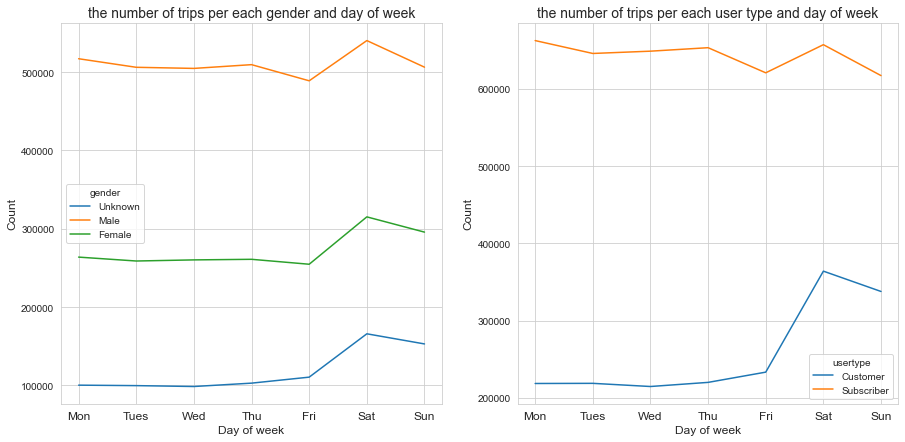

In [6]:
# calculate the numbers of trips per each gender and day of week
df_count_gender = df_bike.groupby(['dayofweek',
                                   'gender'],
                                    as_index=False).count()[['dayofweek',
                                                             'gender',
                                                             'tripduration']].rename(columns={'tripduration':'count'})

df_count_gender['gender'] = df_count_gender['gender'].replace(0,'Unknown').replace(1,'Male').replace(2,'Female')

df_count_user = df_bike.groupby(['usertype',
                                 'dayofweek'],
                                 as_index=False).count()[['usertype',
                                                          'dayofweek',
                                                          'tripduration']].rename(columns={'tripduration':'count'})
sns.set_style('whitegrid');
plt.subplots(1,2,figsize=(15,7))

plt.subplot(1,2,1)
plt.title('the number of trips per each gender and day of week', fontsize=14);
sns.lineplot(data=df_count_gender, x='dayofweek', y='count', hue='gender');
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');
plt.xlabel('Day of week', fontsize=12);
plt.ylabel('Count', fontsize=12);

plt.subplot(1,2,2)
plt.title('the number of trips per each user type and day of week', fontsize=14);
sns.lineplot(data=df_count_user, x='dayofweek', y='count', hue='usertype');
plt.xticks(ticks = [0,1,2,3,4,5,6], labels = ['Mon','Tues','Wed','Thu','Fri','Sat','Sun'],fontsize='12');
plt.xlabel('Day of week', fontsize=12);
plt.ylabel('Count', fontsize=12);

## Distribution of trip durations in each user type, gender and hour of day

> 1. Trip duration of 'Unknown' group looks higher than that of 'Female' among 'customers', however, trip duraion of 'Unknown' group of 'subscribers' looks lower than that of 'Female' group of 'subscribers' <br>
2. Trips from 0 a.m to 5 a.m showed different pattern with pattern from 6 a.m to 11 p.m. 

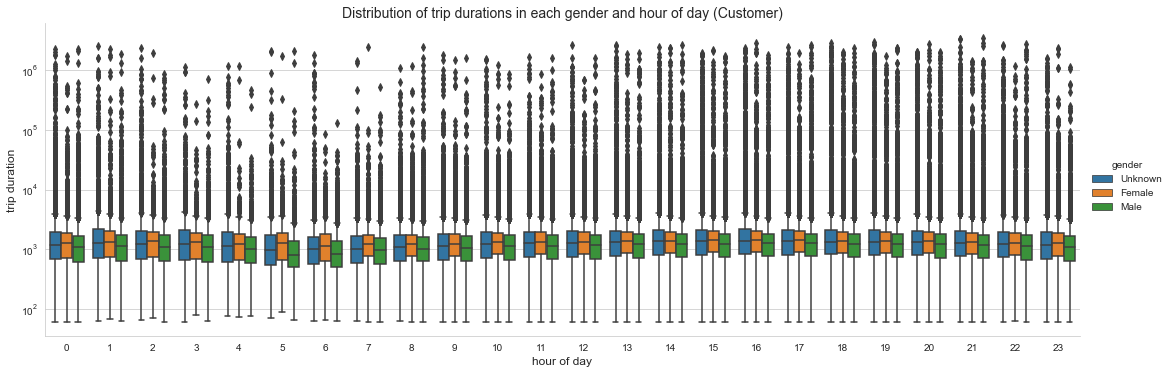

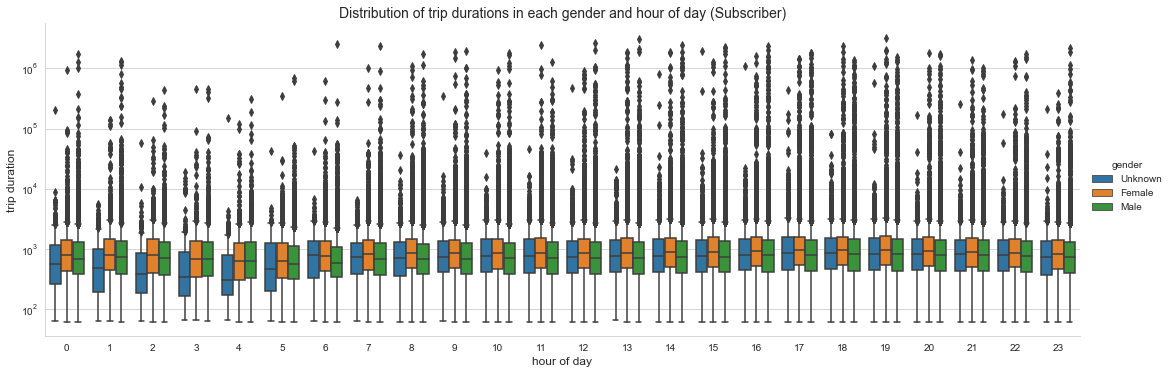

In [12]:
df_bike['gender'] = df_bike['gender'].replace(0,'Unknown').replace(1,'Male').replace(2,'Female')
df_customer = df_bike.loc[df_bike['usertype']=='Customer']
df_subscriber = df_bike.loc[df_bike['usertype']=='Subscriber']

fig = plt.figure()
ax1 = fig.add_subplot(211)
g = sns.catplot(x="starthour", y="tripduration", hue="gender",
            kind="box", aspect=3, data=df_customer, hue_order=['Unknown','Female','Male']);
plt.yscale('log')
plt.title('Distribution of trip durations in each gender and hour of day (Customer)', fontsize=14);
plt.ylabel('trip duration', fontsize=12);
plt.xlabel('hour of day', fontsize=12);

ax2 = fig.add_subplot(212)
g = sns.catplot(x="starthour", y="tripduration", hue="gender",
            kind="box", aspect=3, data=df_subscriber, hue_order=['Unknown','Female','Male']);
plt.yscale('log')
plt.title('Distribution of trip durations in each gender and hour of day (Subscriber)', fontsize=14);
plt.ylabel('trip duration', fontsize=12);
plt.xlabel('hour of day', fontsize=12);

plt.close(0)
plt.close(1)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!cd

In [ ]:
!jupyter nbconvert slide_deck.ipynb --to slides